In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data1 = pd.read_csv('../fangchan/lianjia1.csv', encoding='gbk')
data2 = pd.read_csv('../fangchan/lianjia2.csv', encoding='gbk')
data3 = pd.read_csv('../fangchan/lianjia3.csv', encoding='utf-8')
data4 = pd.read_csv('../fangchan/lianjia4.csv', encoding='utf-8')
data5 = pd.read_csv('../fangchan/lianjia5.csv', encoding='utf-8')
data6 = pd.read_csv('../fangchan/lianjia6.csv', encoding='utf-8')
data7 = pd.read_csv('../fangchan/lianjia7.csv', encoding='utf-8')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7])
data = data.dropna()

In [3]:
data.cjdanjia =  np.round(data.cjdanjia.str.replace('元/平', '').astype(np.float32).map(lambda x:x/10000), 2)

In [4]:
data.cjshijian = pd.to_datetime(data.cjshijian.map(lambda x:x[5:]))

In [5]:
data = data[data.cjxiaoqu.str.contains('远洋山水')]

In [6]:
data = data.sort_values(by='cjshijian')

In [7]:
data = data.set_index('cjshijian')['2012':]

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


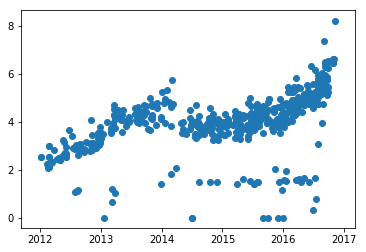

In [8]:
plt.scatter(data.index, data.cjdanjia)

In [9]:
data = data[data.cjdanjia > 1]

In [10]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [11]:
data = data[['time', 'cjdanjia']]

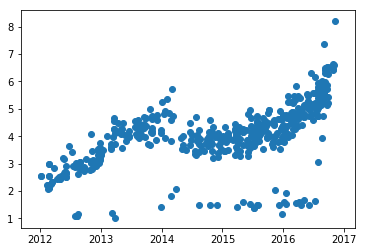

In [12]:
plt.scatter(data.index, data.cjdanjia)


In [13]:
data = data[data.cjdanjia > 1]

In [14]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [15]:
data = data[['time', 'cjdanjia']]

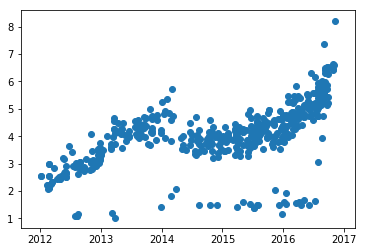

In [16]:
plt.scatter(data.index, data.cjdanjia)


In [17]:
data = data[data.cjdanjia > 1]

In [18]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [19]:
data = data[['time', 'cjdanjia']]

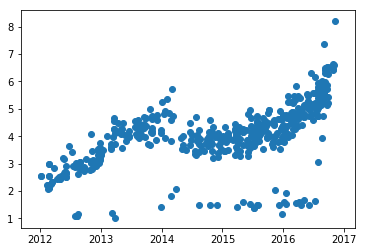

In [20]:
plt.scatter(data.index, data.cjdanjia)


In [21]:
data = data[data.cjdanjia > 1]

In [22]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [23]:
data = data[['time', 'cjdanjia']]

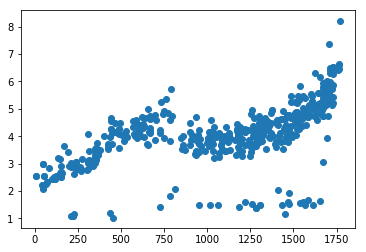

In [24]:
plt.scatter(data.time, data.cjdanjia)

In [25]:
X = data.time
Y = data.cjdanjia

In [26]:
model = LinearRegression()
model.fit(pd.DataFrame(X), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# 预测效果不好
x=[[0], [1800]]
y=model.predict(pd.DataFrame(x))



In [28]:
model2 = LinearRegression()
model2.fit(pd.DataFrame({'x2':X*X, 'x1':X}), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

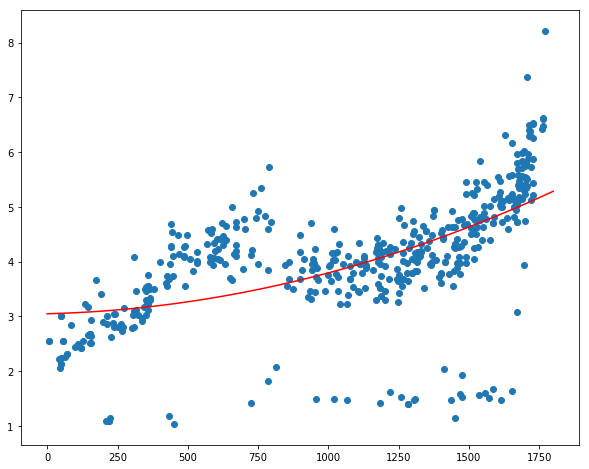

In [29]:
x = np.linspace(0, 1800)
y = model2.predict(pd.DataFrame({'x2':x*x, 'x1':x}))
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='r')
plt.scatter(data.time, data.cjdanjia)

In [30]:
q3 = PolynomialFeatures(degree=3)

In [31]:
# 生成3阶多项式
X3=q3.fit_transform(pd.DataFrame(X))

In [32]:
model3 = LinearRegression()
model3.fit(X3, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

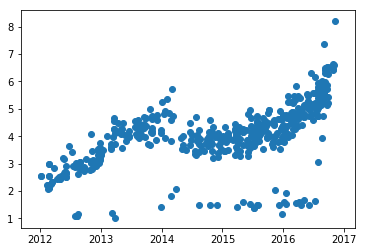

In [33]:
plt.scatter(data.index, data.cjdanjia)


In [34]:
data = data[data.cjdanjia > 1]

In [35]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [36]:
data = data[['time', 'cjdanjia']]

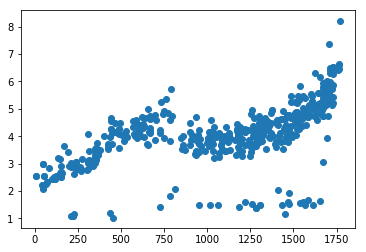

In [37]:
plt.scatter(data.time, data.cjdanjia)

In [38]:
X = data.time
Y = data.cjdanjia

In [39]:
model = LinearRegression()
model.fit(pd.DataFrame(X), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# 预测效果不好
x=[[0], [1800]]
y=model.predict(pd.DataFrame(x))



In [41]:
model2 = LinearRegression()
model2.fit(pd.DataFrame({'x2':X*X, 'x1':X}), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

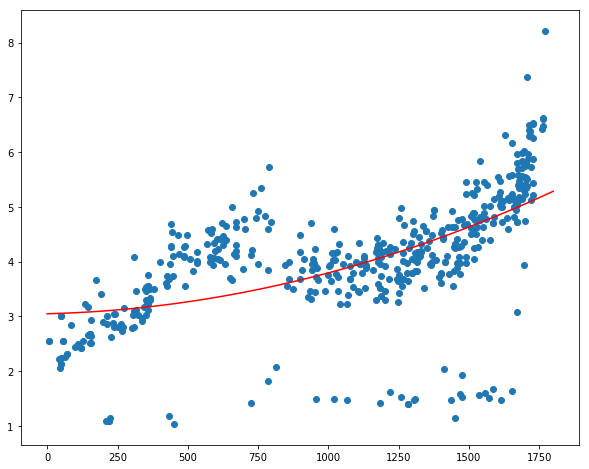

In [42]:
x = np.linspace(0, 1800)
y = model2.predict(pd.DataFrame({'x2':x*x, 'x1':x}))
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='r')
plt.scatter(data.time, data.cjdanjia)

In [43]:
q3 = PolynomialFeatures(degree=3)

In [44]:
# 生成3阶多项式
X3=q3.fit_transform(pd.DataFrame(X))

In [45]:
model3 = LinearRegression()
model3.fit(X3, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

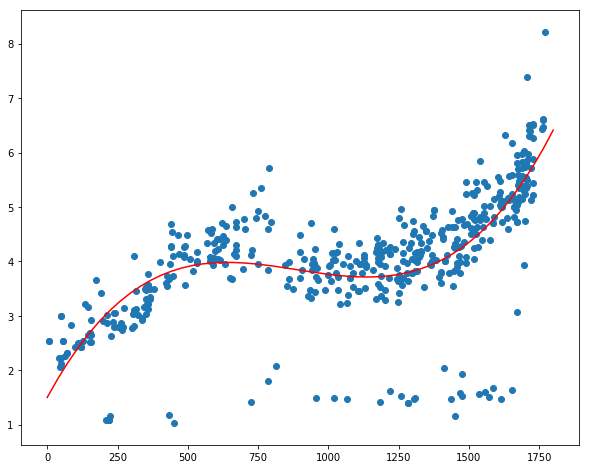

In [46]:
x = np.linspace(0, 1800)
y = model3.predict(q3.fit_transform(pd.DataFrame(x)))
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='r')
plt.scatter(data.time, data.cjdanjia)

In [47]:
X_train, X_test = X[:'2016-5'], X['2016-5':]
Y_train, Y_test = Y[:'2016-5'], Y['2016-5':]

In [48]:
X_train_ = q3.fit_transform(pd.DataFrame(X_train))

In [49]:
model3_train = LinearRegression()
model3_train.fit(X_train_.values.reshape(-1, 1), Y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
np.sum((model3_train.predict(q3.fit_transform(pd.DataFrame(X_test))) - Y_test)**2)

In [ ]:
np.sum((model3_train.predict(q3.fit_transform(pd.DataFrame(X_test))) - Y_test)**2)

In [ ]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [ ]:
data = data[['time', 'cjdanjia']]

In [ ]:
plt.scatter(data.time, data.cjdanjia)

In [ ]:
X = data.time
Y = data.cjdanjia

In [ ]:
model = LinearRegression()
model.fit(pd.DataFrame(X), Y)

In [ ]:
# 预测效果不好
x=[[0], [1800]]
y=model.predict(pd.DataFrame(x))



In [ ]:
model2 = LinearRegression()
model2.fit(pd.DataFrame({'x2':X*X, 'x1':X}), Y)

In [ ]:
x = np.linspace(0, 1800)
y = model2.predict(pd.DataFrame({'x2':x*x, 'x1':x}))
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='r')
plt.scatter(data.time, data.cjdanjia)

In [ ]:
q3 = PolynomialFeatures(degree=3)

In [ ]:
# 生成3阶多项式
X3=q3.fit_transform(pd.DataFrame(X))

In [ ]:
model3 = LinearRegression()
model3.fit(X3, Y)


In [ ]:
x = np.linspace(0, 1800)
y = model3.predict(q3.fit_transform(pd.DataFrame(x)))
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='r')
plt.scatter(data.time, data.cjdanjia)

In [ ]:
X_train, X_test = X[:'2016-5'], X['2016-5':]
Y_train, Y_test = Y[:'2016-5'], Y['2016-5':]

In [ ]:
X_train_ = q3.fit_transform(pd.DataFrame(X_train))

In [ ]:
model3_train = LinearRegression()
model3_train.fit(X_train_.values.reshape(-1, 1), Y_train)

In [ ]:
np.sum((model3_train.predict(q3.fit_transform(pd.DataFrame(X_test))) - Y_test)**2)

In [ ]:
np.sum((model3_train.predict(q3.fit_transform(pd.DataFrame(X_test))) - Y_test)**2)

In [ ]:
data = data.assign(time = (data.index - pd.to_datetime('2012-01-01')).days)

In [ ]:
data = data[['time', 'cjdanjia']]

In [ ]:
plt.scatter(data.time, data.cjdanjia)

In [ ]:
X = data.time
Y = data.cjdanjia

In [ ]:
model = LinearRegression()
model.fit(pd.DataFrame(X), Y)

In [ ]:
# 预测效果不好
x=[[0], [1800]]
y=model.predict(pd.DataFrame(x))



In [ ]:
model2 = LinearRegression()
model2.fit(pd.DataFrame({'x2':X*X, 'x1':X}), Y)

In [ ]:
x = np.linspace(0, 1800)
y = model2.predict(pd.DataFrame({'x2':x*x, 'x1':x}))
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='r')
plt.scatter(data.time, data.cjdanjia)

In [ ]:
q3 = PolynomialFeatures(degree=3)

In [ ]:
# 生成3阶多项式
X3=q3.fit_transform(pd.DataFrame(X))

In [ ]:
model3 = LinearRegression()
model3.fit(X3, Y)


In [ ]:
x = np.linspace(0, 1800)
y = model3.predict(q3.fit_transform(pd.DataFrame(x)))
plt.figure(figsize=(10, 8))
plt.plot(x, y, color='r')
plt.scatter(data.time, data.cjdanjia)

In [ ]:
X_train, X_test = X[:'2016-5'], X['2016-5':]
Y_train, Y_test = Y[:'2016-5'], Y['2016-5':]

In [ ]:
X_train_ = q3.fit_transform(pd.DataFrame(X_train))

In [ ]:
model3_train = LinearRegression()
model3_train.fit(X_train_.values.reshape(-1, 1), Y_train)

In [ ]:
np.sum((model3_train.predict(q3.fit_transform(pd.DataFrame(X_test))) - Y_test)**2)